In [19]:
import os
import csv
import json
import matplotlib.pyplot as plt
from matplotlib import rcParams


# # For Japanese
import matplotlib.font_manager as fm # noqa
rcParams["font.family"] = "Yu Mincho"

In [20]:
class PlotStyler():
    def __init__(self, n, cmap="Set1", change_linestyle=True):
        assert cmap in ["hsv", "Set1", "Accent"]
        self.cmap = cmap
        self.i = -1
        self.n = n
        self.cm = plt.get_cmap(cmap)
        if change_linestyle:
            self.linestyles = [
                "solid", "dotted", "dashed", "dashdot", 
                (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 5, 1, 5, 1, 5))
            ]
        else:
            self.linestyles = ["solid"]

    def get(self):
        self.i += 1
        ls = self.linestyles[self.i % len(self.linestyles)]
        if self.cmap in ["hsv", "Accent"]:
            c = self.cm(self.i/self.n)
        else:
            c = self.cm(self.i)
        return c, ls

In [21]:
def write_data(data_dict):

    csv_path = "history_data.csv"

    with open(csv_path, 'w', newline='') as file:
        writer = csv.writer(file)
        for d in data_dict:
            writer.writerow(d)
            writer.writerow(data_dict[d])

In [22]:
def plot(data_dict, xlim=None, ylim=None, title=None, cmap="Set1", label_font_size=24, std_rate=1.0):
    plt.rcParams["font.size"] = 30
    ps = PlotStyler(16, cmap=cmap)
    fig=plt.figure(figsize=(24, 10), dpi= 80, facecolor="w", edgecolor="k")
    if title is not None:
        fig.suptitle(title)
    ax1 = fig.add_subplot(111)

    # print(compare_data)

    for sim in data_dict:
        c, ls = ps.get()
        generations = data_dict[sim]["generations"]
        mean_rewards = data_dict[sim]["eval_rewards"]
        label = data_dict[sim]["simname"]
        # std_rewards = data_dict[sim]["compare_std"]
        # if std_rate > 0:
        #     ax1.fill_between(generations, mean_rewards-std_rate*std_rewards, mean_rewards+std_rate*std_rewards, color=c, alpha=0.2)
        ax1.plot(generations, mean_rewards, color=c, linestyle=ls, label=label, linewidth=3)

    # ax1.axvline(x=9000, alpha=0.3)
    h, l = ax1.get_legend_handles_labels()
    plt.rcParams["font.size"] = label_font_size
    ax1.legend(h, l, loc="upper left")
    ax1.set_xlabel("世代")
    ax1.set_ylabel("累積報酬")

    if ylim is not None:
        ax1.set_ylim(ylim)
    if xlim is not None:
        ax1.set_xlim(xlim)
    

In [23]:
def extract_data(simlist):

    data_dict = {}
    for sim in simlist:
        cfgfile = os.path.join("log", sim[0], "cfg.json")
        with open(cfgfile, "r") as f:
            cfg = json.load(f)
        switch_generation = cfg["switch_generation"]
        filename = os.path.join("log", sim[0], "linked_history.json")
        with open(filename, "r") as f:
            history = json.load(f)
            generations = []
            eval_rewards = []
            best_eval_reward=0
            for d in history:
                generations.append(d["generation"])
                if d["current_best_eval_reward"] > best_eval_reward:
                    eval_rewards.append(d["current_best_eval_reward"])
                    best_eval_reward = d["current_best_eval_reward"]
                else:
                    eval_rewards.append(best_eval_reward)
                if d["generation"] == switch_generation:
                    best_eval_reward  = 0




            data_dict[sim[0]] = {"simname":sim[1], "generations":generations, "eval_rewards":eval_rewards}
    
    return data_dict

# def extract_eval_rewards(history):
#     generations = []
#     eval_rewards = []
#     for d in history:
#         generations.append(d["generation"])
#         eval_rewards.append(d["current_best_eval_reward"])
    
#     return{
#         "generations":generations,
#         "eval_rewards":eval_rewards
#     } 



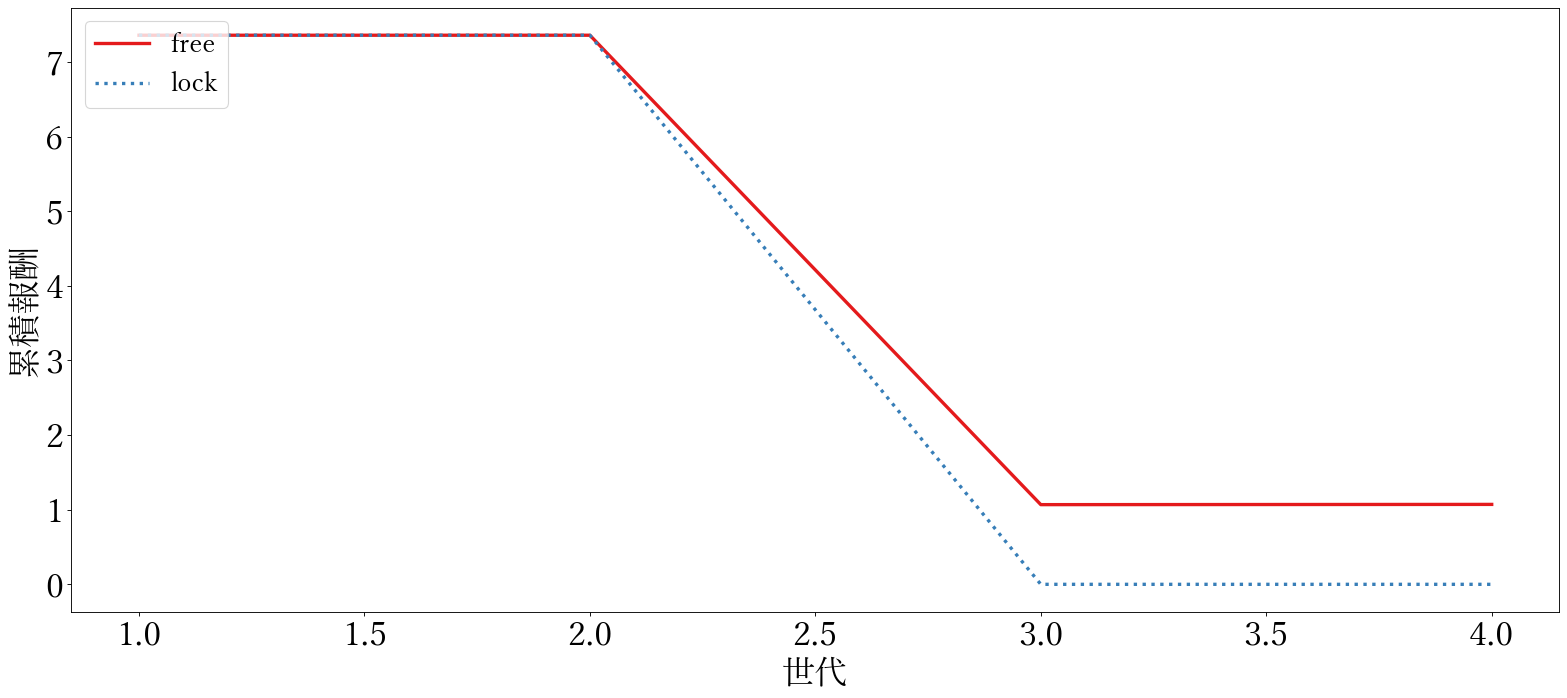

In [24]:
simlist=[
["curriculum_second_half_free_1","free"],
# ["curriculum_second_half_lock_1","lock"],
]

d = extract_data(simlist)
plot(d)